In [89]:
import numpy as np
import networkx as nx
import pandas as pd

import warnings

from scipy import stats
from itertools import combinations
from sklearn import preprocessing
from collections import defaultdict

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [4]:
warnings.simplefilter('ignore')

In [5]:
def mirror_d1d2_iter(df):
    for r1 in df.to_dict('records'):
        yield r1
        r2 = r1.copy()
        r2['d1'], r2['d2'] = r2['d2'], r2['d1']
        yield r2

In [6]:
def mirror_d1d2(df):
    return pd.DataFrame(list(mirror_d1d2_iter(df)))

# All-vs-all probability mass correlations - LSTM

In [12]:
lstm_pcorr = pd.read_json('data/hl-graph-lstm-pcorr.json', lines=True)
lstm_pcorr = mirror_d1d2(lstm_pcorr)
lstm_pcorr = lstm_pcorr.drop(columns=['kt_p', 'pr_p', 'sp_p'])
lstm_pcorr = lstm_pcorr.set_index(['d1', 'd2'])
lstm_pcorr = lstm_pcorr.add_prefix('lstm_pcorr_')
lstm_pcorr = lstm_pcorr.reset_index()

In [13]:
lstm_pcorr.sort_values('lstm_pcorr_kt', ascending=False).head(10)

,d1,d2,lstm_pcorr_kt,lstm_pcorr_pr,lstm_pcorr_sp
52,bloomberg.com,wsj.com,0.544591,0.244900,0.730285
53,wsj.com,bloomberg.com,0.544591,0.244900,0.730285
59,dailycaller.com,breitbart.com,0.504639,0.235545,0.688357
58,breitbart.com,dailycaller.com,0.504639,0.235545,0.688357
203,wsj.com,nytimes.com,0.489553,0.158381,0.672381
202,nytimes.com,wsj.com,0.489553,0.158381,0.672381
184,msnbc.com,thehill.com,0.478135,0.121547,0.660237
185,thehill.com,msnbc.com,0.478135,0.121547,0.660237
190,npr.org,nytimes.com,0.468058,0.189297,0.645672
191,nytimes.com,npr.org,0.468058,0.189297,0.645672


# All-vs-all probability mass correlations - CBOW

In [14]:
cbow_pcorr = pd.read_json('data/hl-graph-cbow-pcorr.json', lines=True)
cbow_pcorr = mirror_d1d2(cbow_pcorr)
cbow_pcorr = cbow_pcorr.drop(columns=['kt_p', 'pr_p', 'sp_p'])
cbow_pcorr = cbow_pcorr.set_index(['d1', 'd2'])
cbow_pcorr = cbow_pcorr.add_prefix('cbow_pcorr_')
cbow_pcorr = cbow_pcorr.reset_index()

In [15]:
cbow_pcorr.sort_values('cbow_pcorr_kt', ascending=False).head(10)

,d1,d2,cbow_pcorr_kt,cbow_pcorr_pr,cbow_pcorr_sp
53,wsj.com,bloomberg.com,0.649152,0.581247,0.838633
52,bloomberg.com,wsj.com,0.649152,0.581247,0.838633
190,npr.org,nytimes.com,0.524353,0.423397,0.710882
191,nytimes.com,npr.org,0.524353,0.423397,0.710882
87,huffingtonpost.com,buzzfeed.com,0.524248,0.232072,0.709984
86,buzzfeed.com,huffingtonpost.com,0.524248,0.232072,0.709984
59,dailycaller.com,breitbart.com,0.510685,0.392066,0.696504
58,breitbart.com,dailycaller.com,0.510685,0.392066,0.696504
184,msnbc.com,thehill.com,0.483489,0.303908,0.670869
185,thehill.com,msnbc.com,0.483489,0.303908,0.670869


# All-vs-all probability mass correlations - LR

In [16]:
lr_pcorr = pd.read_json('data/hl-graph-lr-pcorr.json', lines=True)
lr_pcorr = mirror_d1d2(lr_pcorr)
lr_pcorr = lr_pcorr.rename(columns={'kt_corr': 'kt', 'pr_corr': 'pr', 'sp_corr': 'sp'})
lr_pcorr = lr_pcorr.set_index(['d1', 'd2'])
lr_pcorr = lr_pcorr.add_prefix('lr_pcorr_')
lr_pcorr = lr_pcorr.reset_index()

In [17]:
lr_pcorr.sort_values('lr_pcorr_kt', ascending=False).head(10)

,d1,d2,lr_pcorr_kt,lr_pcorr_pr,lr_pcorr_sp
53,wsj.com,bloomberg.com,0.558039,0.413881,0.744076
52,bloomberg.com,wsj.com,0.558039,0.413881,0.744076
12,apnews.com,foxnews.com,0.496469,0.353088,0.681913
13,foxnews.com,apnews.com,0.496469,0.353088,0.681913
190,npr.org,nytimes.com,0.480019,0.313131,0.657344
191,nytimes.com,npr.org,0.480019,0.313131,0.657344
184,msnbc.com,thehill.com,0.433828,0.233331,0.601685
185,thehill.com,msnbc.com,0.433828,0.233331,0.601685
87,huffingtonpost.com,buzzfeed.com,0.427143,0.130748,0.584316
86,buzzfeed.com,huffingtonpost.com,0.427143,0.130748,0.584316


# All-vs-all confusion counts - LSTM

In [18]:
lstm_cm = pd.read_json('data/hl-graph-lstm-cm.json', lines=True)
lstm_cm = lstm_cm.set_index(['d1', 'd2'])
lstm_cm = lstm_cm.add_prefix('lstm_cm_')
lstm_cm = lstm_cm.reset_index()

In [19]:
lstm_cm.sort_values('lstm_cm_count', ascending=False).head(10)

,d1,d2,lstm_cm_count
197,wsj.com,bloomberg.com,362
72,dailycaller.com,breitbart.com,321
98,foxnews.com,apnews.com,275
27,bloomberg.com,wsj.com,267
177,thehill.com,msnbc.com,267
81,dailycaller.com,thehill.com,253
137,msnbc.com,thehill.com,232
64,cnn.com,msnbc.com,232
150,npr.org,nytimes.com,215
67,cnn.com,thehill.com,210


# A-vs-B accuracies - LR + SVC

In [20]:
ab_acc = pd.read_json('data/hl-graph-ab-acc.json', lines=True)
ab_acc = mirror_d1d2(ab_acc)

# Use 1-acc, so that high score -> high similarity.
ab_acc['inv_lr'] = 1 - ab_acc.acc_lr
ab_acc['inv_svc'] = 1 - ab_acc.acc_svc
ab_acc = ab_acc.drop(columns=['acc_lr', 'acc_svc'])

ab_acc = ab_acc.set_index(['d1', 'd2'])
ab_acc = ab_acc.add_prefix('ab_acc_')
ab_acc = ab_acc.reset_index()

In [21]:
ab_acc.sort_values('ab_acc_inv_lr', ascending=False).head(10)

,d1,d2,ab_acc_inv_lr,ab_acc_inv_svc
157,npr.org,nytimes.com,0.338326,0.332244
156,nytimes.com,npr.org,0.338326,0.332244
50,cnn.com,foxnews.com,0.324286,0.314910
51,foxnews.com,cnn.com,0.324286,0.314910
184,washingtonpost.com,npr.org,0.322073,0.314567
185,npr.org,washingtonpost.com,0.322073,0.314567
161,washingtonpost.com,nytimes.com,0.315189,0.314865
160,nytimes.com,washingtonpost.com,0.315189,0.314865
22,bloomberg.com,wsj.com,0.314593,0.309884
23,wsj.com,bloomberg.com,0.314593,0.309884


# A-vs-B confusion counts - LR

In [22]:
ab_cm_lr = pd.read_json('data/hl-graph-ab-cm-lr.json', lines=True)
ab_cm_lr = ab_cm_lr.rename(columns={'count': 'ab_cm_lr_count'})

In [23]:
ab_cm_lr.sort_values('ab_cm_lr_count', ascending=False).head(10)

,ab_cm_lr_count,d1,d2
68,2133.74,cnn.com,washingtonpost.com
166,2052.58,nytimes.com,washingtonpost.com
152,1934.01,npr.org,washingtonpost.com
124,1894.24,huffingtonpost.com,washingtonpost.com
63,1833.32,cnn.com,huffingtonpost.com
60,1822.31,cnn.com,dailycaller.com
65,1814.03,cnn.com,npr.org
62,1754.52,cnn.com,foxnews.com
61,1753.54,cnn.com,dailykos.com
197,1742.23,wsj.com,bloomberg.com


# A-vs-B confusions counts - SVC

In [24]:
ab_cm_svc = pd.read_json('data/hl-graph-ab-cm-svc.json', lines=True)
ab_cm_svc = ab_cm_svc.rename(columns={'count': 'ab_cm_svc_count'})

In [25]:
ab_cm_svc.sort_values('ab_cm_svc_count', ascending=False).head(10)

,ab_cm_svc_count,d1,d2
68,2187.51,cnn.com,washingtonpost.com
166,2181.79,nytimes.com,washingtonpost.com
152,1973.93,npr.org,washingtonpost.com
63,1835.90,cnn.com,huffingtonpost.com
124,1808.89,huffingtonpost.com,washingtonpost.com
62,1791.70,cnn.com,foxnews.com
60,1780.71,cnn.com,dailycaller.com
197,1772.99,wsj.com,bloomberg.com
65,1761.37,cnn.com,npr.org
164,1752.33,nytimes.com,npr.org


# All-vs-all confusion counts - LR

In [26]:
ava_cm_lr = pd.read_json('data/hl-graph-ava-cm-lr.json', lines=True)
ava_cm_lr = ava_cm_lr.rename(columns={'count': 'ava_cm_lr_count'})

In [27]:
ava_cm_lr.sort_values('ava_cm_lr_count', ascending=False).head(10)

,ava_cm_lr_count,d1,d2
197,999.633,wsj.com,bloomberg.com
115,894.667,huffingtonpost.com,buzzfeed.com
177,653.345,thehill.com,msnbc.com
188,600.023,washingtonpost.com,dailykos.com
98,590.786,foxnews.com,apnews.com
132,561.900,msnbc.com,dailykos.com
185,544.365,washingtonpost.com,buzzfeed.com
64,535.291,cnn.com,msnbc.com
118,516.878,huffingtonpost.com,dailykos.com
137,496.345,msnbc.com,thehill.com


# All-vs-all confusion counts - SVC

In [28]:
ava_cm_svc = pd.read_json('data/hl-graph-ava-cm-svc.json', lines=True)
ava_cm_svc = ava_cm_svc.rename(columns={'count': 'ava_cm_svc_count'})

In [29]:
ava_cm_svc.sort_values('ava_cm_svc_count', ascending=False).head(10)

,ava_cm_svc_count,d1,d2
197,958.204,wsj.com,bloomberg.com
115,838.648,huffingtonpost.com,buzzfeed.com
188,552.011,washingtonpost.com,dailykos.com
132,543.985,msnbc.com,dailykos.com
177,523.013,thehill.com,msnbc.com
72,517.675,dailycaller.com,breitbart.com
27,514.217,bloomberg.com,wsj.com
118,509.411,huffingtonpost.com,dailykos.com
6,499.532,apnews.com,foxnews.com
185,495.317,washingtonpost.com,buzzfeed.com


# All metrics

In [30]:
df = (lstm_pcorr
    .merge(cbow_pcorr)
    .merge(lr_pcorr)
    .merge(lstm_cm)
    .merge(ab_acc)
    .merge(ab_cm_lr)
    .merge(ab_cm_svc)
    .merge(ava_cm_lr)
    .merge(ava_cm_svc))

In [31]:
df.sort_values('lstm_cm_count', ascending=False).head(10)

,d1,d2,lstm_pcorr_kt,lstm_pcorr_pr,lstm_pcorr_sp,cbow_pcorr_kt,cbow_pcorr_pr,cbow_pcorr_sp,lr_pcorr_kt,lr_pcorr_pr,lr_pcorr_sp,lstm_cm_count,ab_acc_inv_lr,ab_acc_inv_svc,ab_cm_lr_count,ab_cm_svc_count,ava_cm_lr_count,ava_cm_svc_count
53,wsj.com,bloomberg.com,0.544591,0.244900,0.730285,0.649152,0.581247,0.838633,0.558039,0.413881,0.744076,362,0.314593,0.309884,1742.23,1772.99,999.633,958.204
59,dailycaller.com,breitbart.com,0.504639,0.235545,0.688357,0.510685,0.392066,0.696504,0.370343,0.210245,0.522243,321,0.302224,0.295565,1281.06,1270.25,475.826,517.675
13,foxnews.com,apnews.com,0.240590,0.096741,0.343792,0.434015,0.386803,0.608815,0.496469,0.353088,0.681913,275,0.299040,0.293665,1176.14,1040.06,590.786,469.860
185,thehill.com,msnbc.com,0.478135,0.121547,0.660237,0.483489,0.303908,0.670869,0.433828,0.233331,0.601685,267,0.273898,0.264022,1342.74,1230.49,653.345,523.013
52,bloomberg.com,wsj.com,0.544591,0.244900,0.730285,0.649152,0.581247,0.838633,0.558039,0.413881,0.744076,267,0.314593,0.309884,1219.65,1134.00,474.416,514.217
132,dailycaller.com,thehill.com,0.426649,0.138389,0.597465,0.414587,0.258344,0.583952,0.337392,0.148710,0.479668,253,0.279767,0.268648,1303.21,1232.58,461.953,412.967
184,msnbc.com,thehill.com,0.478135,0.121547,0.660237,0.483489,0.303908,0.670869,0.433828,0.233331,0.601685,232,0.273898,0.264022,1241.64,1247.44,496.345,475.824
108,cnn.com,msnbc.com,0.409234,0.152077,0.573168,0.169912,0.053168,0.248357,0.212435,0.049913,0.307652,232,0.255859,0.247469,1506.88,1494.11,535.291,427.206
190,npr.org,nytimes.com,0.468058,0.189297,0.645672,0.524353,0.423397,0.710882,0.480019,0.313131,0.657344,215,0.338326,0.332244,1475.18,1376.91,444.095,352.941
114,cnn.com,thehill.com,0.266552,0.052812,0.386499,0.151007,0.017594,0.223159,0.179786,0.021425,0.263981,210,0.276821,0.271013,1661.21,1692.81,425.506,390.519


Group on `d1`, scale scores with other outlets.

In [32]:
for col in set(df.columns) - {'d1', 'd2'}:
    df[f'{col}_scaled'] = df.groupby('d1')[col].transform(preprocessing.scale)

In [33]:
df['label'] = df[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

In [34]:
df_melted = df.melt(['d1', 'd2', 'label'], [c for c in df.columns if c.endswith('_scaled')])

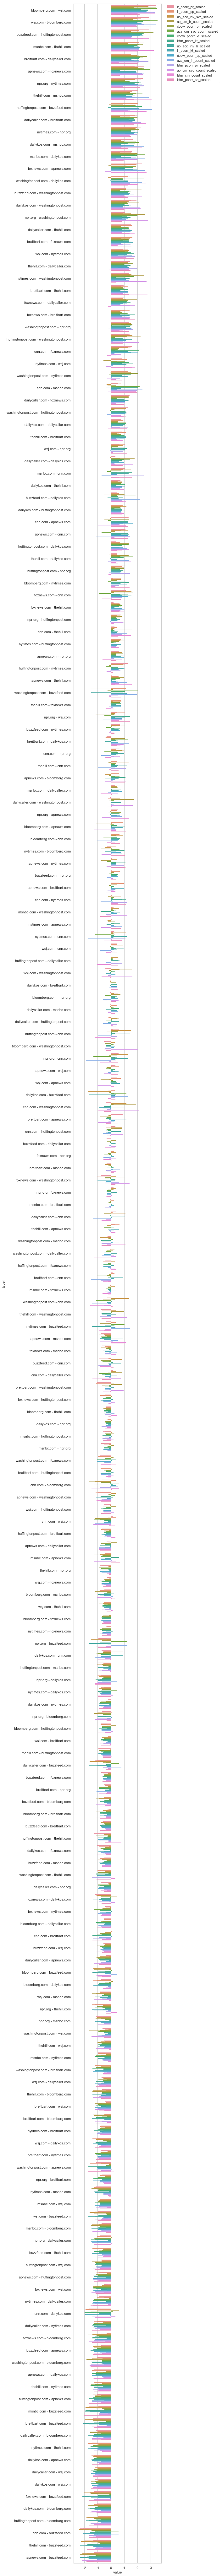

In [35]:
df_melted = df.melt(['d1', 'd2', 'label'], [c for c in df.columns if c.endswith('_scaled')])

# Sort by mean score.
order = df_melted.groupby('label').mean().sort_values('value', ascending=False).index

plt.figure(figsize=(5,150))
ax = sns.barplot(x='value', y='label', data=df_melted, hue='variable', order=order, linewidth=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [36]:
df.to_json('data/hl-graph.json', orient='records', lines=True)

In [45]:
metrics = [c for c in df.columns if c.endswith('_scaled')]

In [84]:
df['mean_score'] = df.apply(lambda r: np.mean([r[m] for m in metrics]), 1)

In [97]:
def make_key(d1, d2):
    return tuple(sorted([d1, d2]))

In [103]:
edges = defaultdict(list)

for r in df.itertuples():
    edges[make_key(r.d1, r.d2)].append(r.mean_score)

In [105]:
rows = [(d1, d2, np.mean(scores)) for (d1, d2), scores in edges.items()]
graph_df = pd.DataFrame(rows, columns=('d1', 'd2', 'score'))

In [119]:
graph_df['width'] = preprocessing.minmax_scale(graph_df.score, (0,2)) ** 3

In [120]:
g = nx.Graph()
for r in graph_df.itertuples():
    g.add_edge(r.d1, r.d2, width=r.width)

In [121]:
edge_width = [d['width'] for _, _, d in g.edges(data=True)]

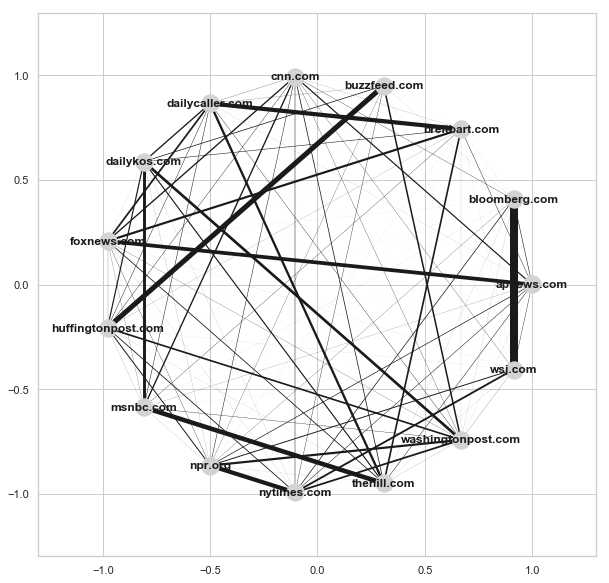

In [122]:
plt.figure(figsize=(10,10))
plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)
pos = nx.layout.circular_layout(g)
nx.draw_networkx_nodes(g, pos, node_color='lightgray')
nx.draw_networkx_edges(g, pos, width=edge_width)
_ = nx.draw_networkx_labels(g, pos, font_weight='bold')